# EDA

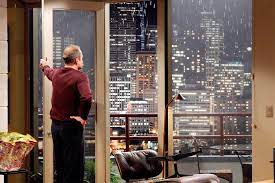

In [2]:
import warnings

warnings.filterwarnings("ignore")

import psycopg2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno #plotting of missing values


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
import os # provides functions for interacting with operating system
from dotenv import load_dotenv # reads key-value pairs from a .env file and can set them as environment variables

load_dotenv() # take environment variables from .env

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

cur = conn.cursor()

sql_query_fetch_all_data = """
    SELECT *
    FROM eda.king_county_house_details
    JOIN eda.king_county_house_sales
    ON eda.king_county_house_details.id = eda.king_county_house_sales.house_id;
"""
cur.execute(sql_query_fetch_all_data)
cur.fetchall()

df_all = pd.read_sql(sql_query_fetch_all_data, conn)
#close the connection
conn.close()
df_all
df_all.to_csv('data/merged_data.csv',index=False)


Read Dataframe

In [3]:
df_houses = pd.read_csv('data/merged_data.csv')

In [ ]:
df_houses.head(5)

In [ ]:
df_houses.tail(5)

In [ ]:
df_houses.describe()

In [14]:
print(df_houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [20]:
df_houses.shape

(21597, 23)

In [34]:
df_houses.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'id.1'],
      dtype='object')

In [4]:
df_houses['bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

In [5]:
# remove duplicate column
df_houses = df_houses.drop(columns='house_id')

In [ ]:
#rename column id.1
df_houses.rename({'id.1':'sale_id'}, axis = 1)

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
id.1                0
dtype: int64


<Axes: >

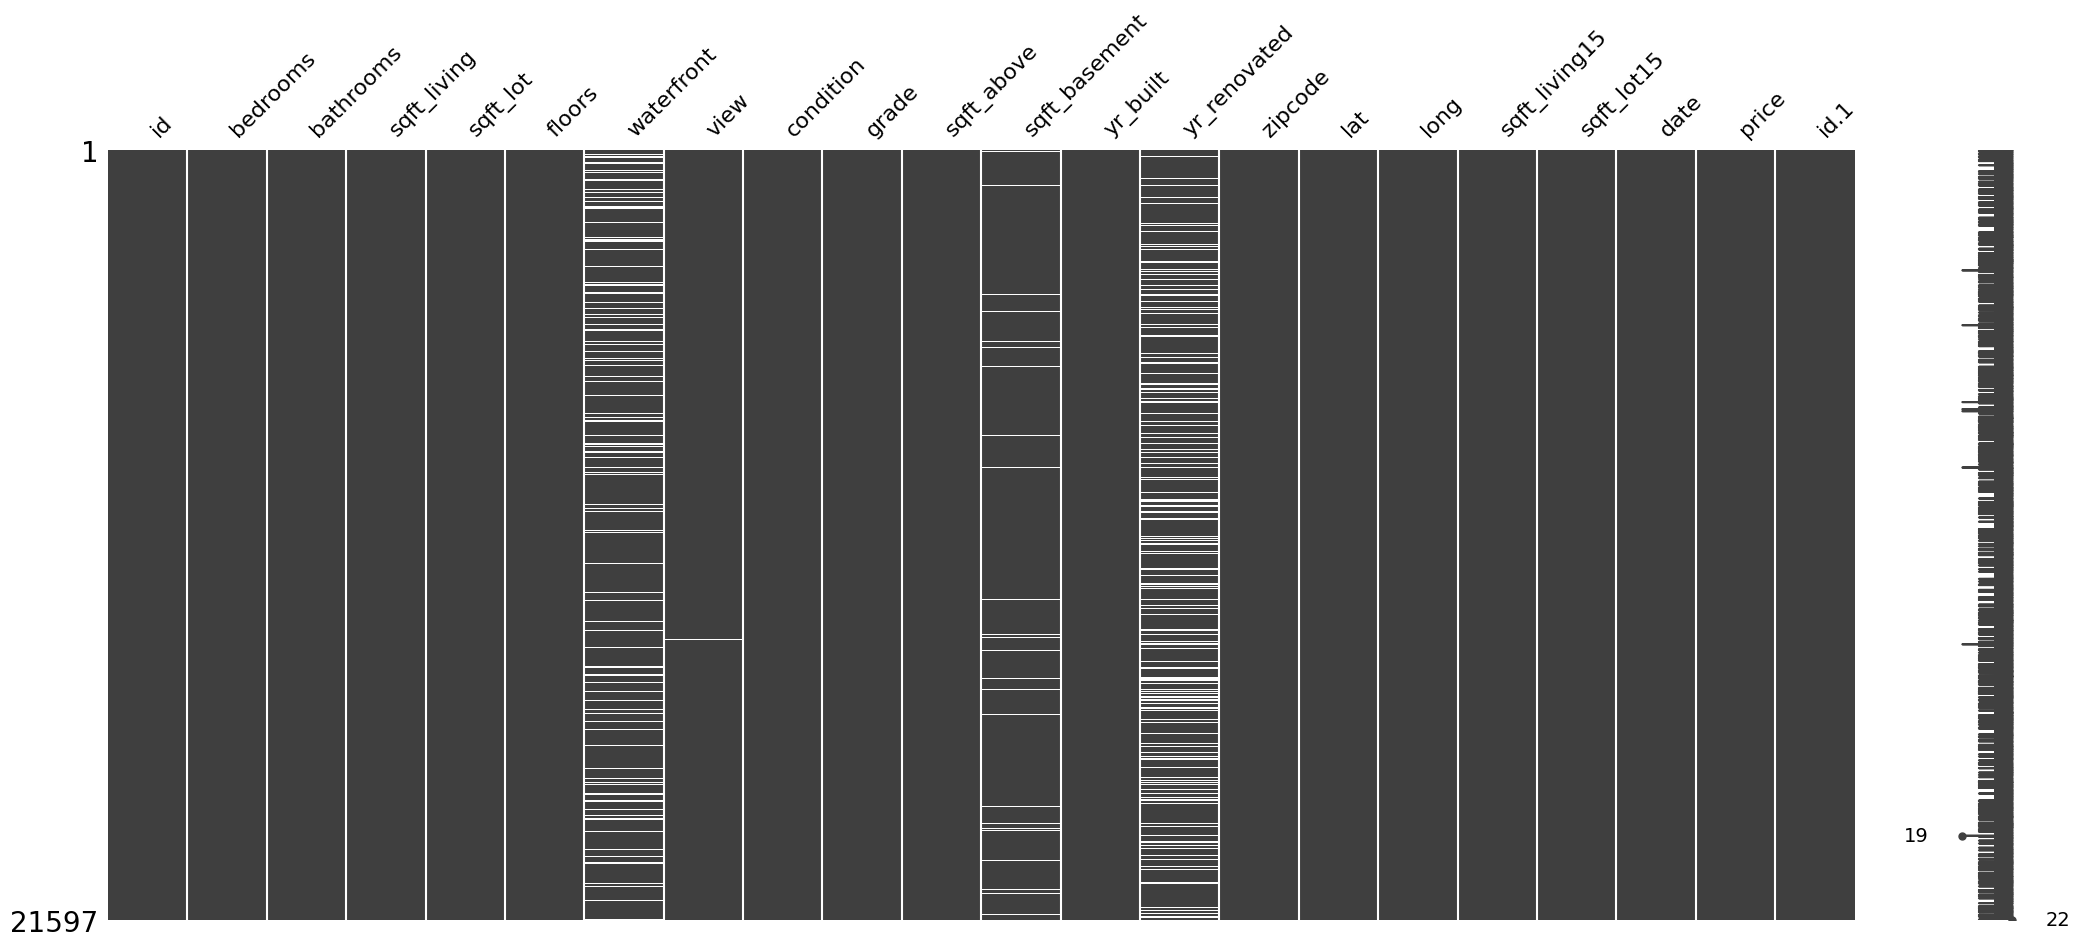

In [7]:
#check for NaNs
print(df_houses.isna().sum())
msno.matrix(df_houses)


<Axes: xlabel='bedrooms', ylabel='sqft_living'>

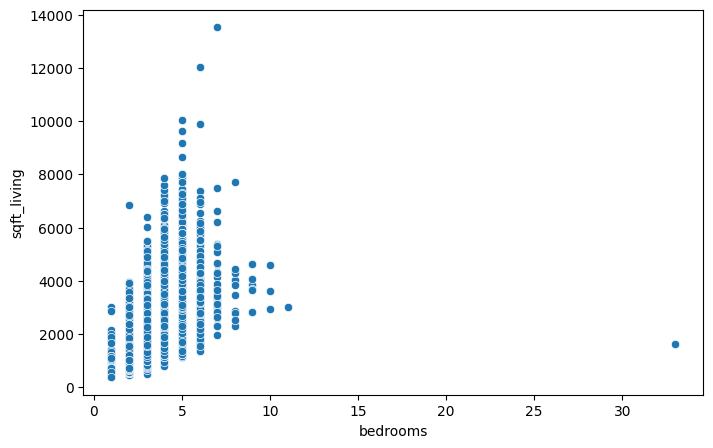

In [13]:
sns.scatterplot(df_houses, x = 'bedrooms', y = 'sqft_living')

In [15]:
df_water = df_houses.dropna(subset='waterfront')

In [19]:
df_water = df_water.query('waterfront == 1')

<Axes: xlabel='price'>

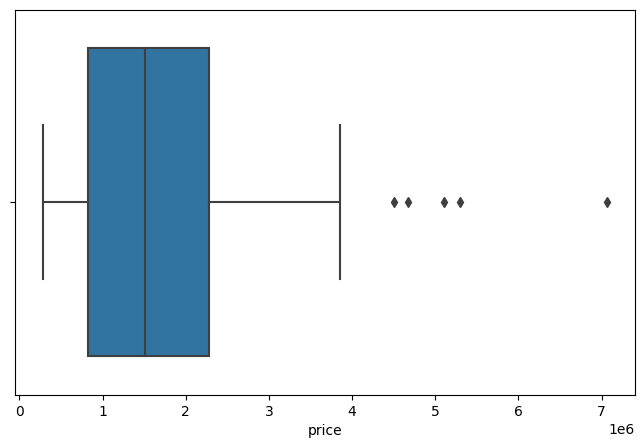

In [24]:
sns.boxplot(df_water, x = 'price')

In [25]:
df_water_3br = df_water.query('bedrooms >= 3') #because at least 2 kids
df_water_3br.head()

In [31]:
df_water_3br['price'].mean().round(2)

1946065.35

<Axes: xlabel='condition', ylabel='price'>

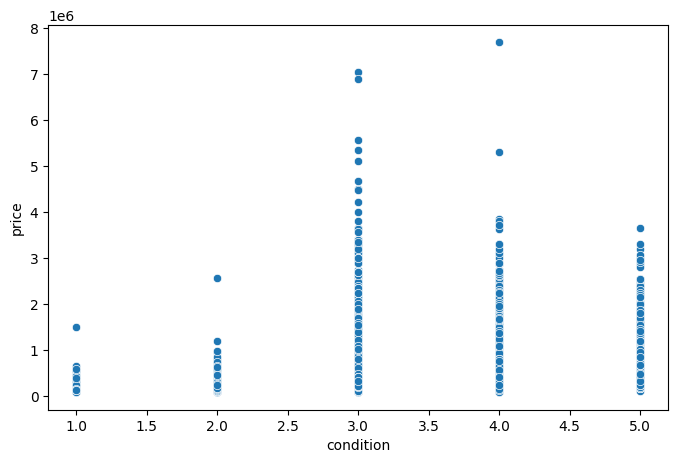

In [34]:
sns.scatterplot(df_houses, x = 'condition', y = 'price')

In [35]:
df_renovated = df_water = df_houses.dropna(subset='yr_renovated')

df_renovated = df_renovated.query('yr_renovated != 0')

<Axes: xlabel='condition', ylabel='yr_renovated'>

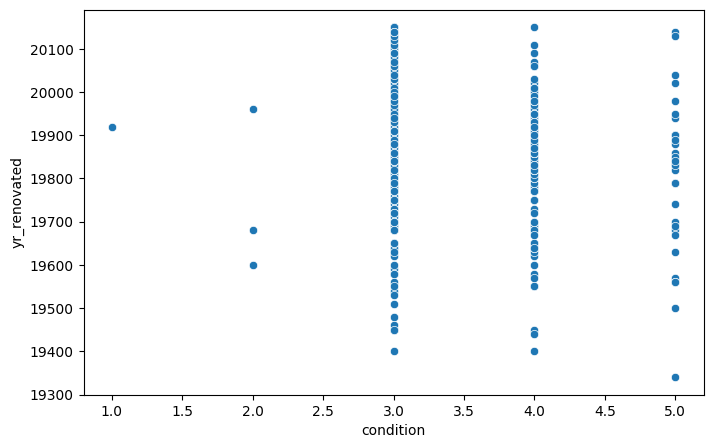

In [48]:
sns.scatterplot(df_renovated, x = 'condition', y = 'yr_renovated')

In [55]:
df_water_3br_nice = df_water_3br.query('condition > 3') # because 'nice'

In [56]:
len(df_water_3br_nice)

46

<Axes: xlabel='sqft_living15', ylabel='sqft_lot15'>

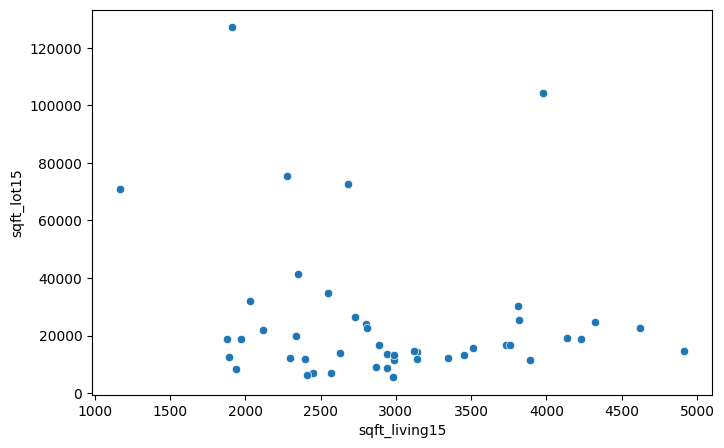

In [63]:
sns.scatterplot(df_water_3br_nice, x = 'sqft_living15', y = 'sqft_lot15')

<Axes: >

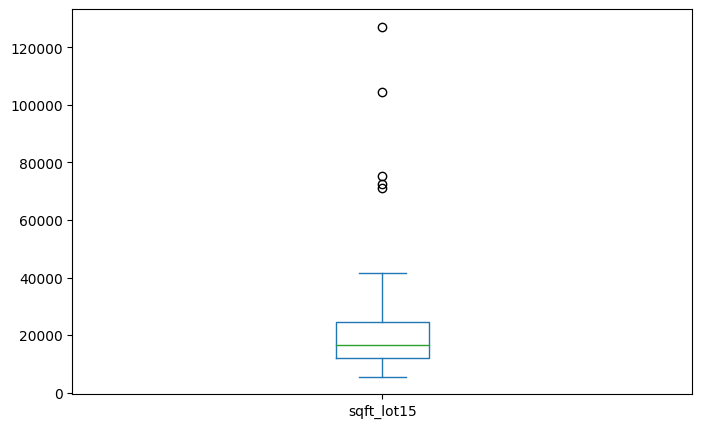

In [61]:
df_water_3br_nice['sqft_lot15'].plot(kind = 'box')

<Axes: >

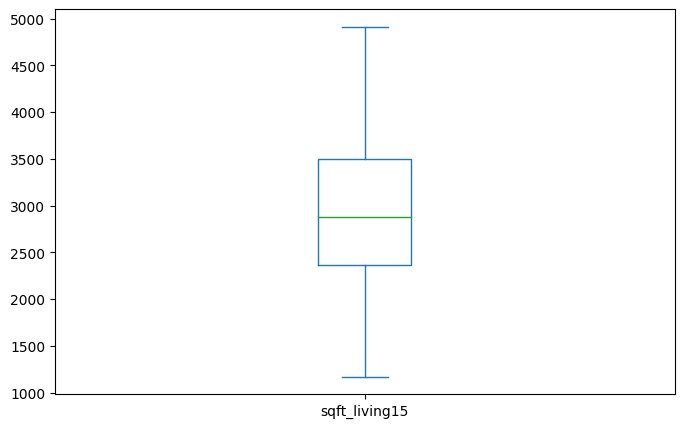

In [62]:
df_water_3br_nice['sqft_living15'].plot(kind = 'box')

<Axes: >

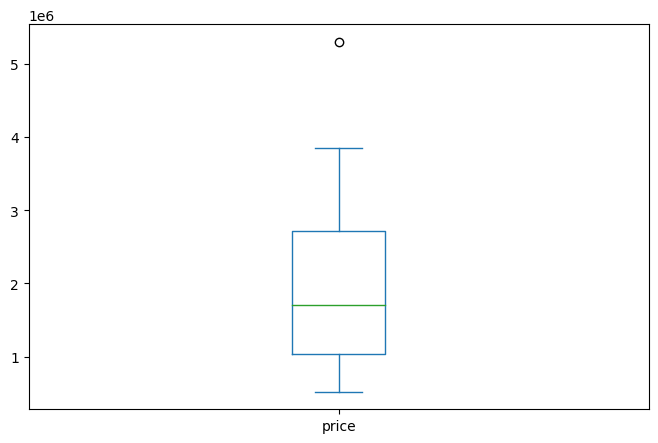

In [64]:
df_water_3br_nice['price'].plot(kind = 'box')

<Axes: >

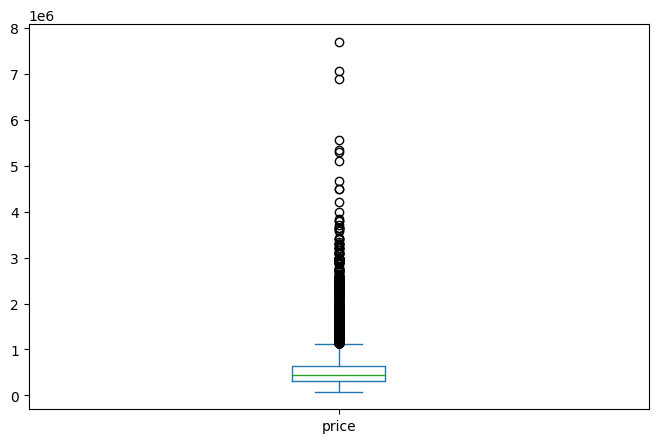

In [65]:
df_houses['price'].plot(kind = 'box')

In [74]:
df_all_met_ex_price = df_water_3br_nice.query('sqft_lot15 > 60000 and sqft_living15 < 2500')

In [75]:
len(df_all_met_ex_price)

3

In [76]:
df_all_met_ex_price['price']

457     705000.000
11412   950000.000
13564   635000.000
Name: price, dtype: float64

In [77]:
df_water['price'].mean()

540926.5771592766